In [66]:
import pandas as pd
from scipy.stats import f_oneway

# Lees de dataset in
df = pd.read_csv('ABT_csv')
# Converteer de 'time_hour' naar datetime en haal de maand eruit
df['time_hour'] = pd.to_datetime(df['time_hour'])
df['month'] = df['time_hour'].dt.month
df['hour'] = df['time_hour'].dt.hour

df = df.dropna(subset=['dep_delay'])
print(df)
monthly_temps = df.groupby(['month'])['dep_delay'].apply(list)
print(monthly_temps)

temps_per_month = [temps for month,dep_delay in monthly_temps.items()]

# print(temps_per_month)
# # Perform one-way ANOVA
f_statistic, p_value = f_oneway(*temps_per_month)

print("F-statistic:", f_statistic)
print("P-value:", p_value)



       dest origin carrier  dep_delay  arr_delay           time_hour   temp  \
0       IAH    EWR      UA        2.0       11.0 2013-01-01 05:00:00  39.02   
1       IAH    LGA      UA        4.0       20.0 2013-01-01 05:00:00  39.92   
2       MIA    JFK      AA        2.0       33.0 2013-01-01 05:00:00  39.02   
3       BQN    JFK      B6       -1.0      -18.0 2013-01-01 05:00:00  39.02   
4       ATL    LGA      DL       -6.0      -25.0 2013-01-01 06:00:00  39.92   
...     ...    ...     ...        ...        ...                 ...    ...   
336765  SYR    JFK      B6       -5.0      -17.0 2013-09-30 22:00:00  60.98   
336766  BUF    JFK      B6      -10.0      -20.0 2013-09-30 22:00:00  60.98   
336767  ROC    JFK      B6       -5.0      -16.0 2013-09-30 22:00:00  60.98   
336768  BOS    JFK      B6       12.0        1.0 2013-09-30 22:00:00  60.98   
336769  PSE    JFK      B6      -10.0      -25.0 2013-09-30 23:00:00  60.08   

         dewp  humid  wind_dir  wind_speed  month  

In [62]:
import pandas as pd
from scipy.stats import f_oneway

# Lees de dataset in
df = pd.read_csv('ABT_csv')
# Converteer de 'time_hour' naar datetime en haal de maand eruit
df['time_hour'] = pd.to_datetime(df['time_hour'])
df['month'] = df['time_hour'].dt.month
df['hour'] = df['time_hour'].dt.hour

df = df.dropna(subset=['temp'])

monthly_temps = df.groupby(['month', 'hour'])['temp'].apply(list)
print(monthly_temps)

temps_per_month = [temps for (month, hour),temps in monthly_temps.items()]

# print(temps_per_month)
# # Perform one-way ANOVA
f_statistic, p_value = f_oneway(*temps_per_month)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

month  hour
1      5       [39.02, 39.92, 39.02, 39.02, 39.02, 39.02, 24....
       6       [39.92, 37.94, 39.92, 37.94, 39.92, 37.94, 37....
       7       [39.92, 39.02, 39.92, 39.92, 39.92, 39.02, 39....
       8       [39.92, 39.92, 39.92, 39.92, 39.92, 39.92, 39....
       9       [39.92, 39.92, 39.92, 39.92, 39.92, 39.92, 39....
                                     ...                        
12     19      [44.96, 44.96, 48.02, 46.94, 44.96, 44.96, 44....
       20      [46.94, 42.08, 44.96, 44.96, 46.94, 42.08, 44....
       21      [46.04, 46.04, 44.06, 46.04, 46.04, 46.04, 44....
       22      [44.06, 44.06, 44.06, 44.06, 46.04, 44.06, 44....
       23      [41.0, 41.0, 42.98, 42.98, 41.0, 41.0, 41.0, 4...
Name: temp, Length: 229, dtype: object
[[39.02, 39.92, 39.02, 39.02, 39.02, 39.02, 24.08, 24.08, 23.0, 24.08, 23.0, 24.08, 24.08, 26.06, 26.06, 26.96, 26.96, 26.96, 26.96, 30.92, 30.92, 35.06, 33.08, 33.08, 33.08, 32.0, 32.0, 33.98, 33.08, 33.08, 33.8, 33.8, 33.08, 33.08, 

In [59]:
#Difference of means test
import pandas as pd
from statsmodels.stats.weightstats import ttest_ind

abt_df = pd.read_csv('ABT_csv')

print("Departure")

carrier1 = abt_df[abt_df['carrier'] == 'F9']['dep_delay'].dropna()
carrier2 = abt_df[abt_df['carrier'] == 'YV']['dep_delay'].dropna()

tstat, pvalue, dof = ttest_ind(carrier1, carrier2, usevar = 'pooled') 

print(f"T-stat F9 vs YV: {tstat}")
print(f"P-value F9 vs YV: {pvalue}")

#UA en OO
carrier1 = abt_df[abt_df['carrier'] == 'UA']['dep_delay'].dropna()
carrier2 = abt_df[abt_df['carrier'] == 'OO']['dep_delay'].dropna()

tstat, pvalue, dof = ttest_ind(carrier1, carrier2, usevar = 'pooled') 

print(f"T-stat UA vs OO: {tstat}")
print(f"P-value UA vs OO: {pvalue}")

#EV en F9
carrier1 = abt_df[abt_df['carrier'] == 'EV']['dep_delay'].dropna()
carrier2 = abt_df[abt_df['carrier'] == 'F9']['dep_delay'].dropna()

tstat, pvalue, dof = ttest_ind(carrier1, carrier2, usevar = 'pooled') 

print(f"T-stat EV vs F9: {tstat}")
print(f"P-value EV vs F9: {pvalue}")


print("Arrival")

carrier1 = abt_df[abt_df['carrier'] == 'F9']['arr_delay'].dropna()
carrier2 = abt_df[abt_df['carrier'] == 'YV']['arr_delay'].dropna()

tstat, pvalue, dof = ttest_ind(carrier1, carrier2, usevar = 'pooled') 

print(f"T-stat F9 vs YV: {tstat}")
print(f"P-value F9 vs YV: {pvalue}")

#UA en OO
carrier1 = abt_df[abt_df['carrier'] == 'UA']['arr_delay'].dropna()
carrier2 = abt_df[abt_df['carrier'] == 'OO']['arr_delay'].dropna()

tstat, pvalue, dof = ttest_ind(carrier1, carrier2, usevar = 'pooled') 

print(f"T-stat UA vs OO: {tstat}")
print(f"P-value UA vs OO: {pvalue}")

#EV en F9
carrier1 = abt_df[abt_df['carrier'] == 'EV']['arr_delay'].dropna()
carrier2 = abt_df[abt_df['carrier'] == 'F9']['arr_delay'].dropna()

tstat, pvalue, dof = ttest_ind(carrier1, carrier2, usevar = 'pooled') 

print(f"T-stat EV vs F9: {tstat}")
print(f"P-value EV vs F9: {pvalue}")

Departure
T-stat F9 vs YV: 0.3895519500574202
P-value F9 vs YV: 0.6969356007664574
T-stat UA vs OO: -0.07236611113946888
P-value UA vs OO: 0.9423108029549767
T-stat EV vs F9: -0.1444426232740492
P-value EV vs F9: 0.8851515205610971
Arrival
T-stat F9 vs YV: 1.9101797240571816
P-value F9 vs YV: 0.056343768267840405
T-stat UA vs OO: -1.0997949889891945
P-value UA vs OO: 0.271426035968121
T-stat EV vs F9: -3.1731230897678566
P-value EV vs F9: 0.0015089666175241748


In [58]:
#Proportie tests
from statsmodels.stats.proportion import proportion_confint
import pandas as pd

abt_df = pd.read_csv('ABT_csv')

aantal_vertragingen_vertrek = (abt_df['dep_delay'] > 0).sum()  
aantal_vertragingen_aankomst = (abt_df['arr_delay'] > 0).sum()

aantal_vluchten = len(abt_df)

ci_low, ci_upp = proportion_confint(aantal_vertragingen_vertrek, aantal_vluchten, alpha=0.05, method='normal')
ci_low_1, ci_upp_1 = proportion_confint(aantal_vertragingen_aankomst, aantal_vluchten, alpha=0.05, method='normal')

print(f"Het betrouwbaarheidsinterval voor de proportie vertragingen bij vertrek is: ({ci_low}, {ci_upp})")
print(f"Het betrouwbaarheidsinterval voor de proportie vertragingen bij aankomst is: ({ci_low_1}, {ci_upp_1})")


#DL, HA, EV
carriers_of_interest = ['DL', 'HA', 'EV']
filtered_df = abt_df[abt_df['carrier'].isin(carriers_of_interest)]

aantal_vertragingen_vertrek = filtered_df[filtered_df['dep_delay'] > 0].groupby('carrier').size()
aantal_vertragingen_aankomst = filtered_df[filtered_df['arr_delay'] > 0].groupby('carrier').size()

aantal_vluchten_per_carrier = filtered_df.groupby('carrier').size()

for carrier in carriers_of_interest:
    n_vertragingen_vertrek = aantal_vertragingen_vertrek.get(carrier, 0)
    n_vluchten = aantal_vluchten_per_carrier.get(carrier, 0)
    ci_low, ci_upp = proportion_confint(n_vertragingen_vertrek, n_vluchten, alpha=0.05, method='normal')
    print(f"Het betrouwbaarheidsinterval voor de proportie vertragingen bij vertrek voor carrier {carrier} is: ({ci_low}, {ci_upp})")

for carrier in carriers_of_interest:
    n_vertragingen_aankomst = aantal_vertragingen_aankomst.get(carrier, 0)
    n_vluchten = aantal_vluchten_per_carrier.get(carrier, 0)
    ci_low, ci_upp = proportion_confint(n_vertragingen_aankomst, n_vluchten, alpha=0.05, method='normal')
    print(f"Het betrouwbaarheidsinterval voor de proportie vertragingen bij aankomst voor carrier {carrier} is: ({ci_low}, {ci_upp})")

Het betrouwbaarheidsinterval voor de proportie vertragingen bij vertrek is: (0.3797168894391031, 0.3829977933173879)
Het betrouwbaarheidsinterval voor de proportie vertragingen bij aankomst is: (0.39328215373516956, 0.39658410751860146)
Het betrouwbaarheidsinterval voor de proportie vertragingen bij vertrek voor carrier DL is: (0.31263770148598535, 0.32095198880709297)
Het betrouwbaarheidsinterval voor de proportie vertragingen bij vertrek voor carrier HA is: (0.15922248432730313, 0.2442862876025214)
Het betrouwbaarheidsinterval voor de proportie vertragingen bij vertrek voor carrier EV is: (0.42296611808781676, 0.43129707575413406)
Het betrouwbaarheidsinterval voor de proportie vertragingen bij aankomst voor carrier DL is: (0.33691927356386353, 0.34539209621372946)
Het betrouwbaarheidsinterval voor de proportie vertragingen bij aankomst voor carrier HA is: (0.2358532450575223, 0.3313982169307818)
Het betrouwbaarheidsinterval voor de proportie vertragingen bij aankomst voor carrier EV 

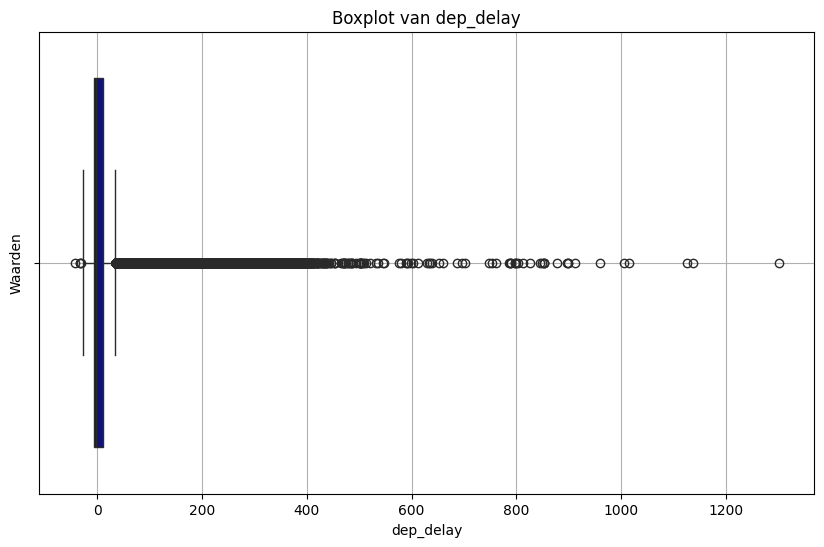

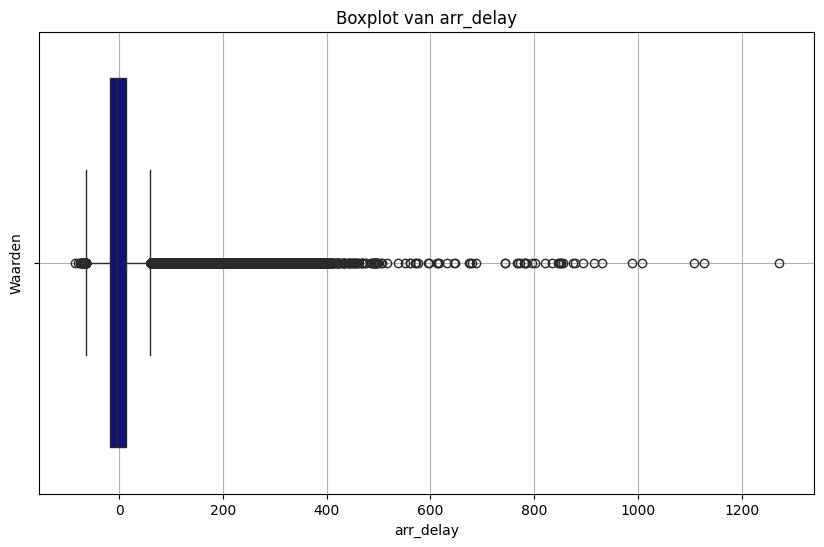

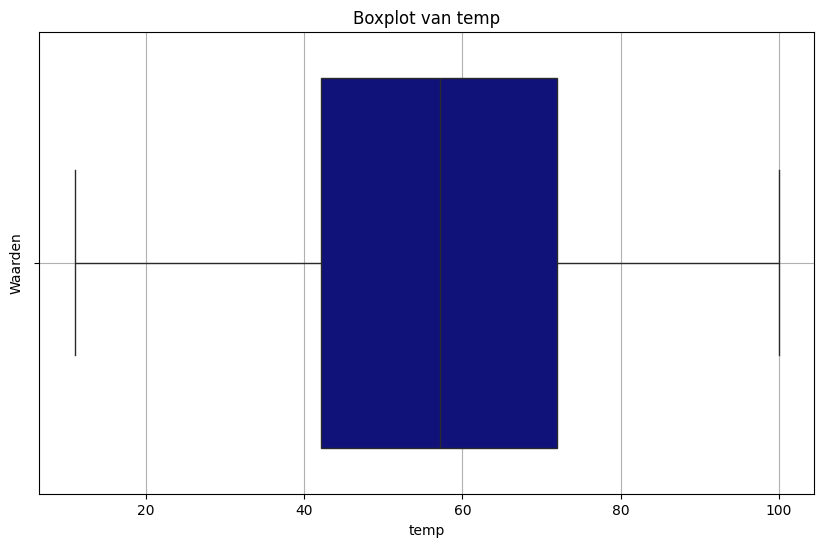

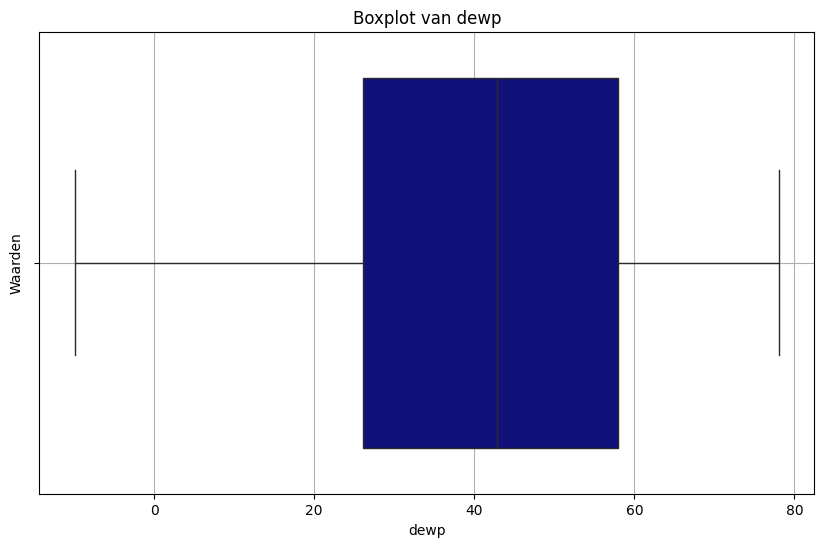

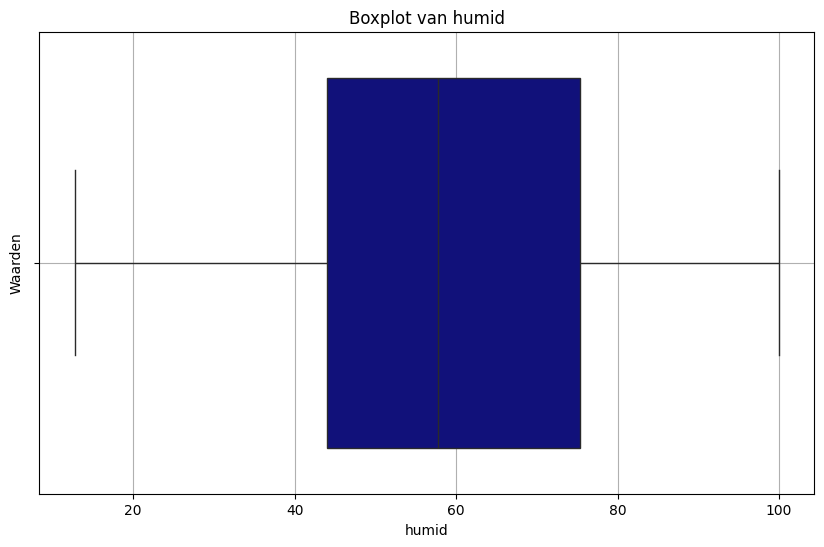

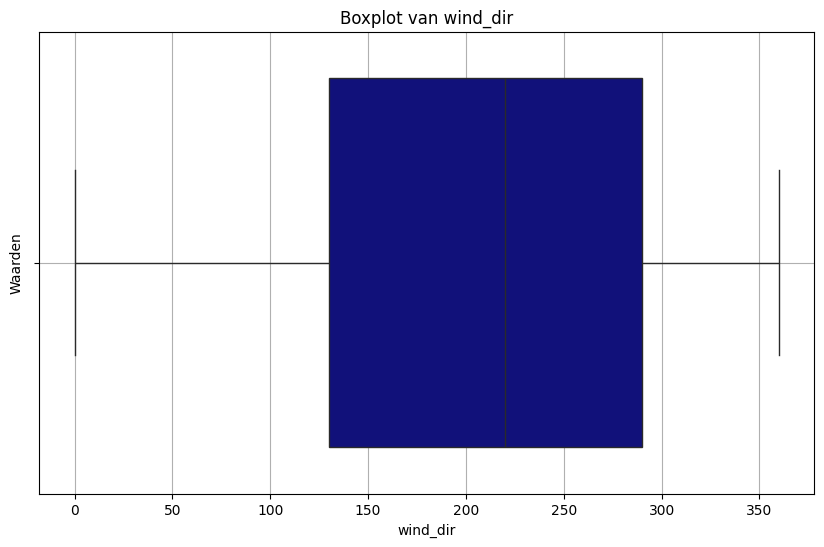

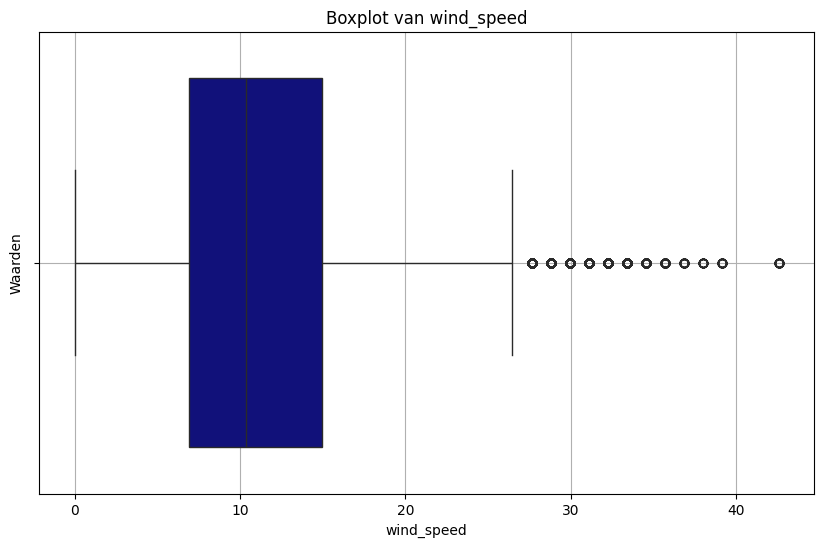

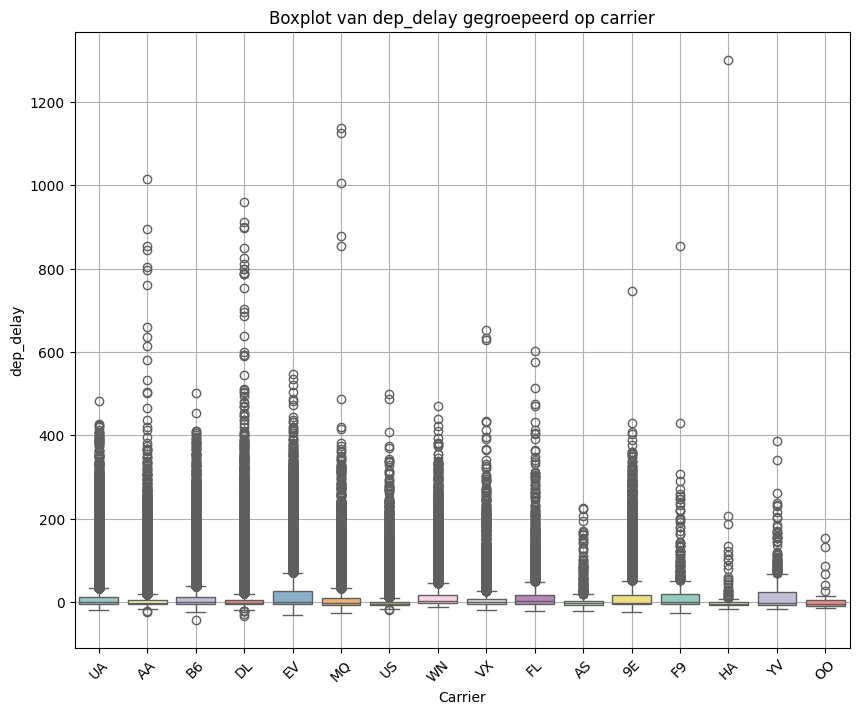

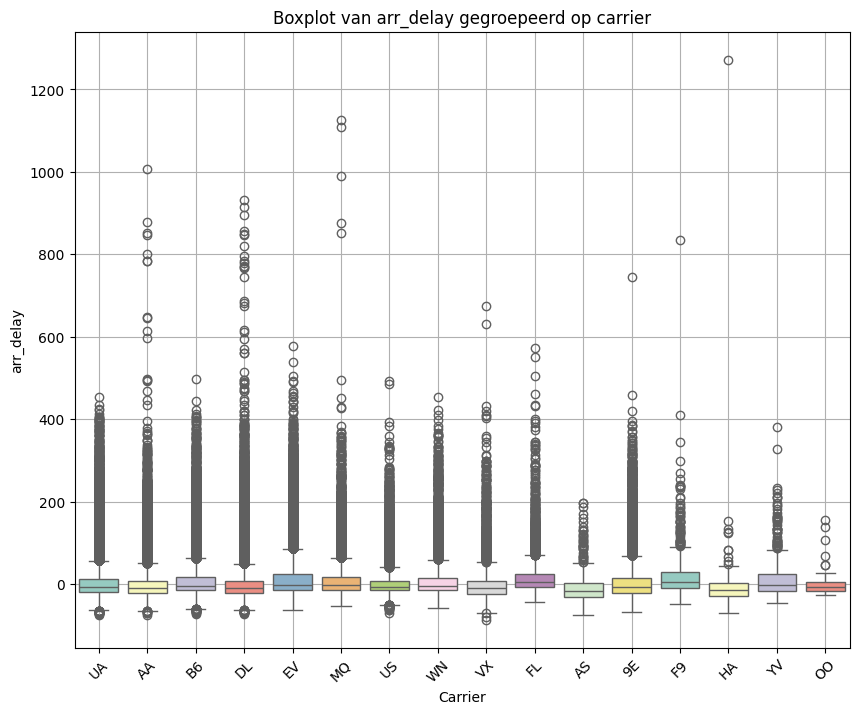

       dest origin carrier  dep_delay  arr_delay           time_hour   temp  \
0       IAH    EWR      UA        2.0       11.0 2013-01-01 05:00:00  39.02   
1       IAH    LGA      UA        4.0       20.0 2013-01-01 05:00:00  39.92   
2       MIA    JFK      AA        2.0       33.0 2013-01-01 05:00:00  39.02   
3       BQN    JFK      B6       -1.0      -18.0 2013-01-01 05:00:00  39.02   
4       ATL    LGA      DL       -6.0      -25.0 2013-01-01 06:00:00  39.92   
...     ...    ...     ...        ...        ...                 ...    ...   
336771  DCA    JFK      9E        NaN        NaN 2013-09-30 14:00:00  68.00   
336772  SYR    LGA      9E        NaN        NaN 2013-09-30 22:00:00  64.94   
336773  BNA    LGA      MQ        NaN        NaN 2013-09-30 12:00:00  69.08   
336774  CLE    LGA      MQ        NaN        NaN 2013-09-30 11:00:00  66.92   
336775  RDU    LGA      MQ        NaN        NaN 2013-09-30 08:00:00  60.98   

         dewp  humid  wind_dir  wind_speed  hour  


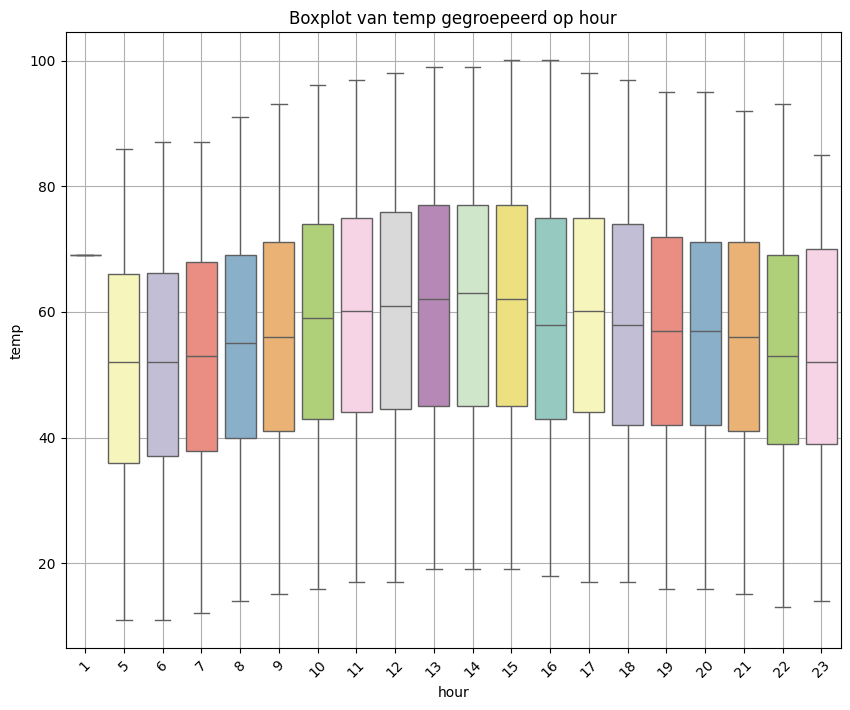

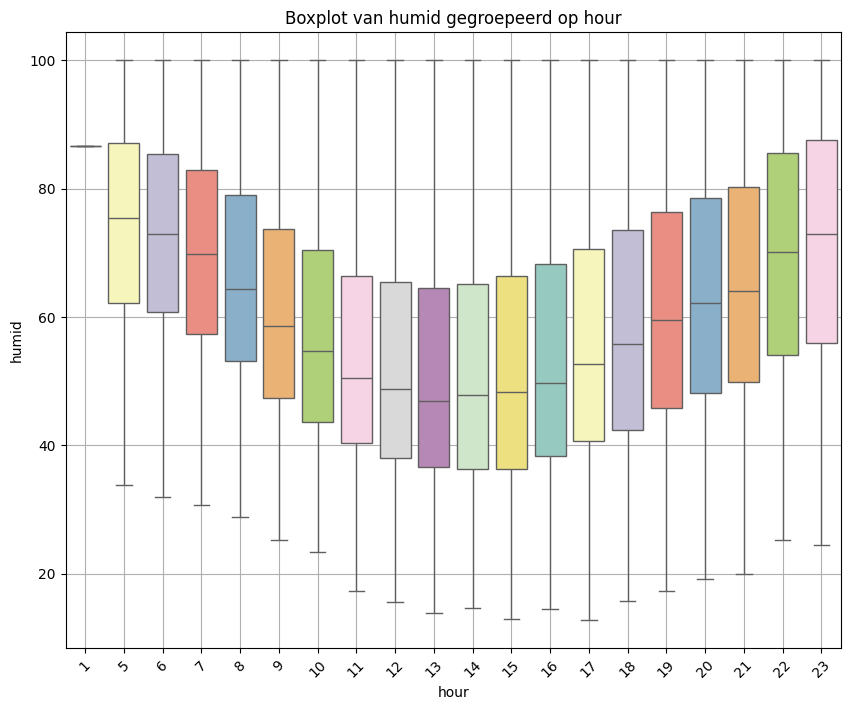

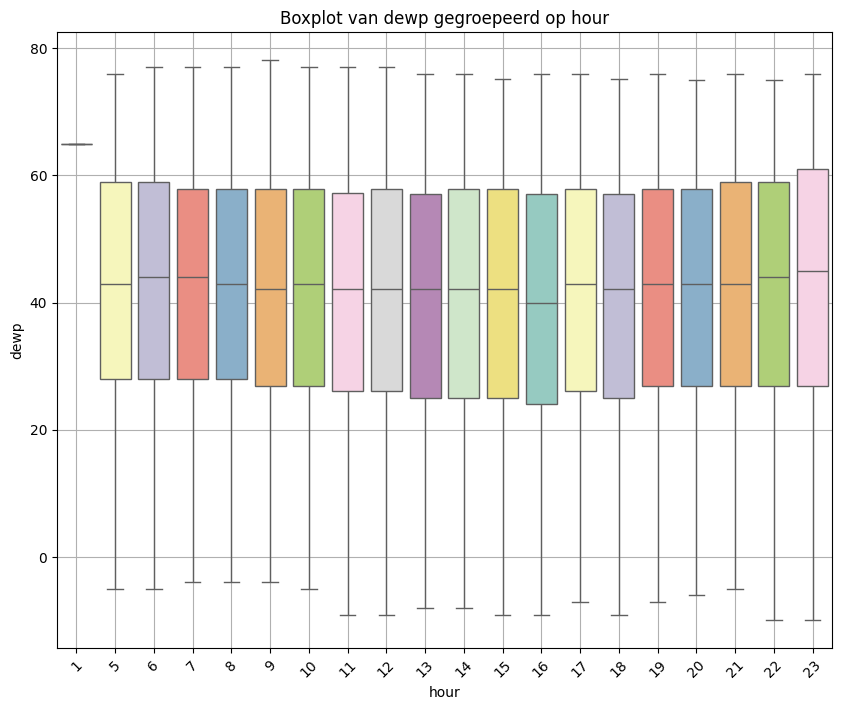

In [49]:
#BOxplots

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

abt_df = pd.read_csv('ABT_csv')

continuous_features = ['dep_delay', 'arr_delay', 'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed']

for feature in continuous_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=abt_df[feature], orient='h', color='darkblue', showfliers=True)
    plt.title(f'Boxplot van {feature}')
    plt.xlabel(feature)
    plt.ylabel('Waarden')
    plt.grid(True)
    plt.show()

categorical_feature = 'carrier'

plt.figure(figsize=(10, 8))
sns.boxplot(x=categorical_feature, y='dep_delay', data=abt_df, hue='carrier', palette='Set3', legend=False)
plt.title('Boxplot van dep_delay gegroepeerd op carrier')
plt.xlabel('Carrier')
plt.ylabel('dep_delay')
plt.xticks(rotation=45)  
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(x=categorical_feature, y='arr_delay', data=abt_df, hue='carrier', palette='Set3', legend=False)
plt.title('Boxplot van arr_delay gegroepeerd op carrier')
plt.xlabel('Carrier')
plt.ylabel('arr_delay')
plt.xticks(rotation=45)  
plt.grid(True)
plt.show()

abt_df['time_hour'] = pd.to_datetime(df['time_hour'])
abt_df['hour'] = abt_df['time_hour'].dt.hour

plt.figure(figsize=(10, 8))
sns.boxplot(x='hour', y='temp', data=abt_df, hue='hour', palette='Set3', legend=False)
plt.title('Boxplot van temp gegroepeerd op hour')
plt.xlabel('hour')
plt.ylabel('temp')
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(x='hour', y='humid', data=abt_df, hue='hour', palette='Set3', legend=False)
plt.title('Boxplot van humid gegroepeerd op hour')
plt.xlabel('hour')
plt.ylabel('humid')
plt.xticks(rotation=45)  
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(x='hour', y='dewp', data=abt_df, hue='hour', palette='Set3', legend=False)
plt.title('Boxplot van dewp gegroepeerd op hour')
plt.xlabel('hour')
plt.ylabel('dewp')
plt.xticks(rotation=45)  
plt.grid(True)
plt.show()


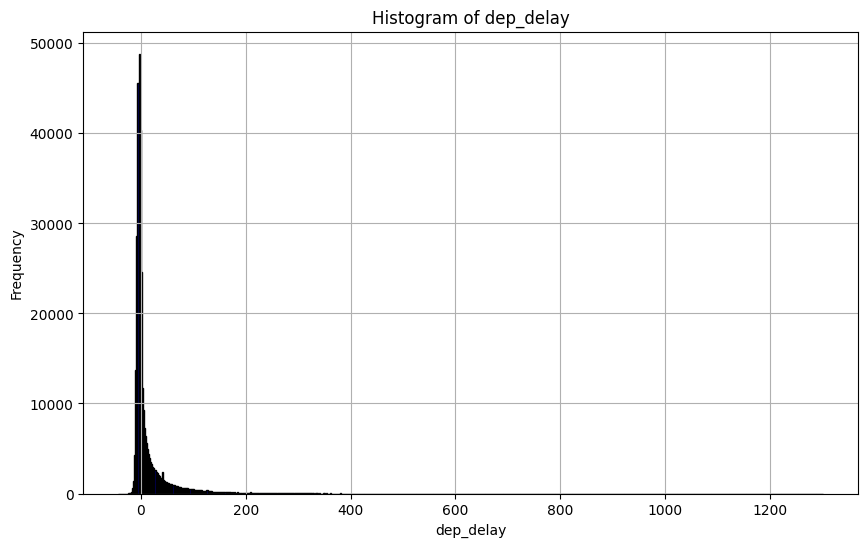

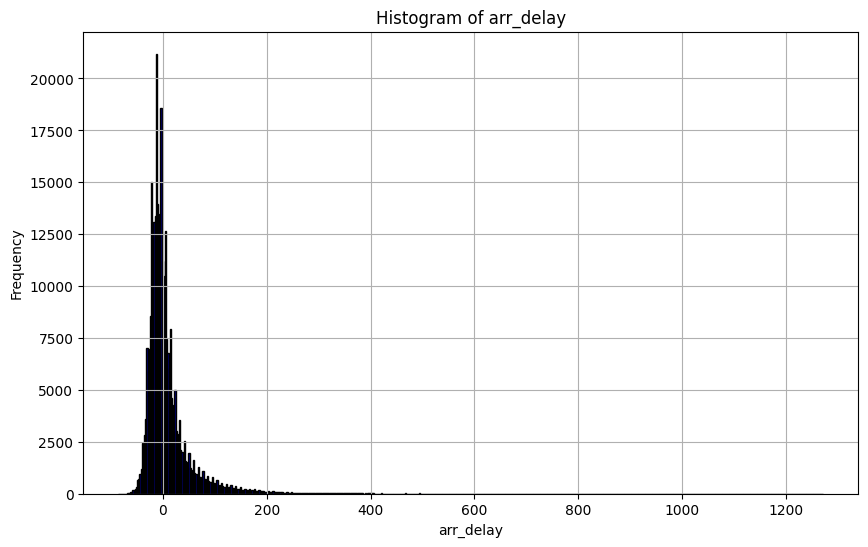

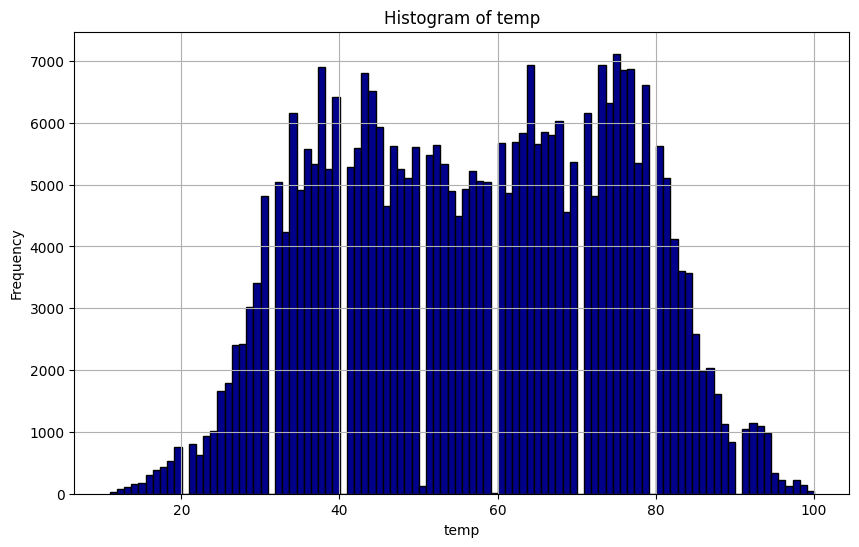

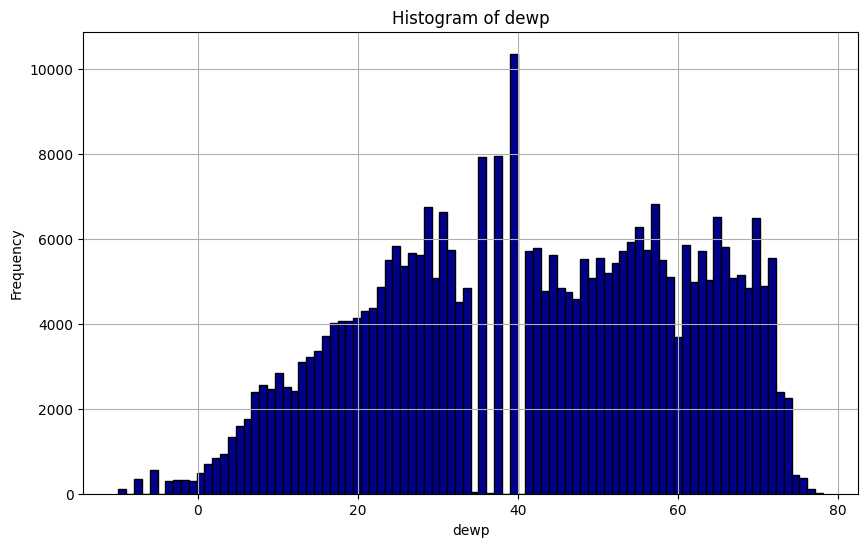

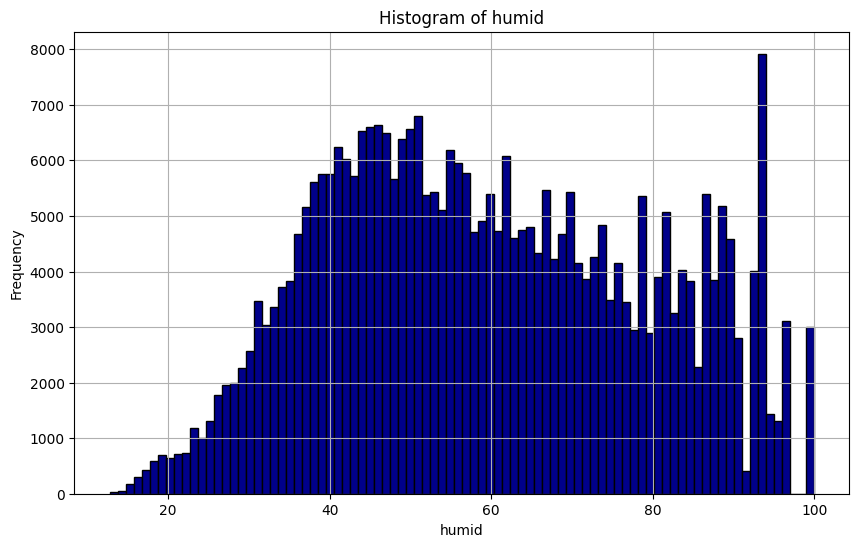

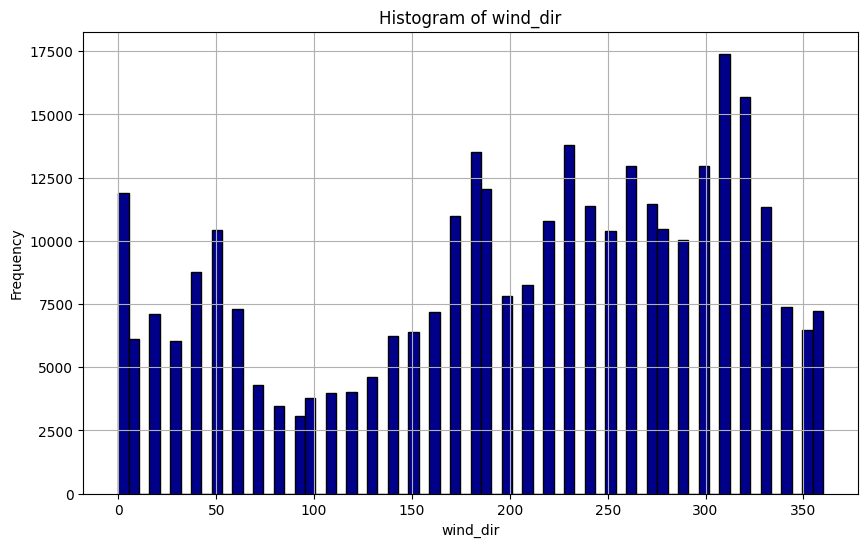

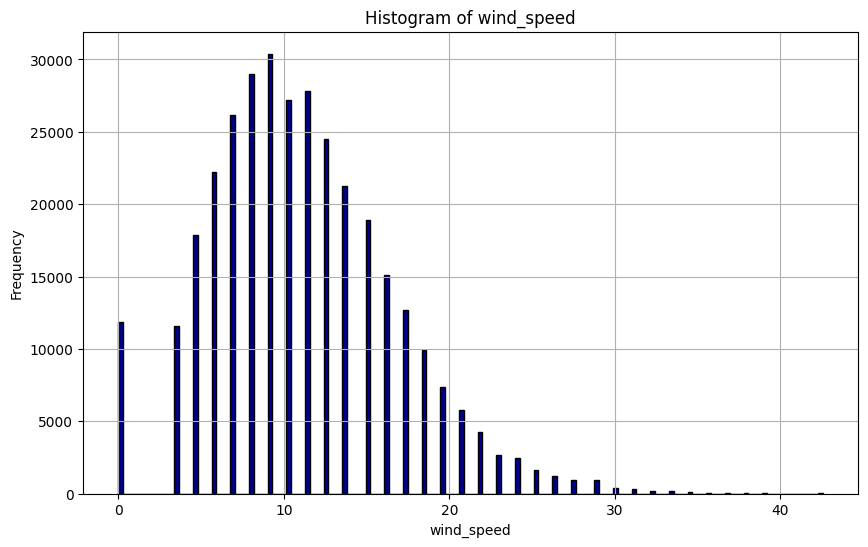

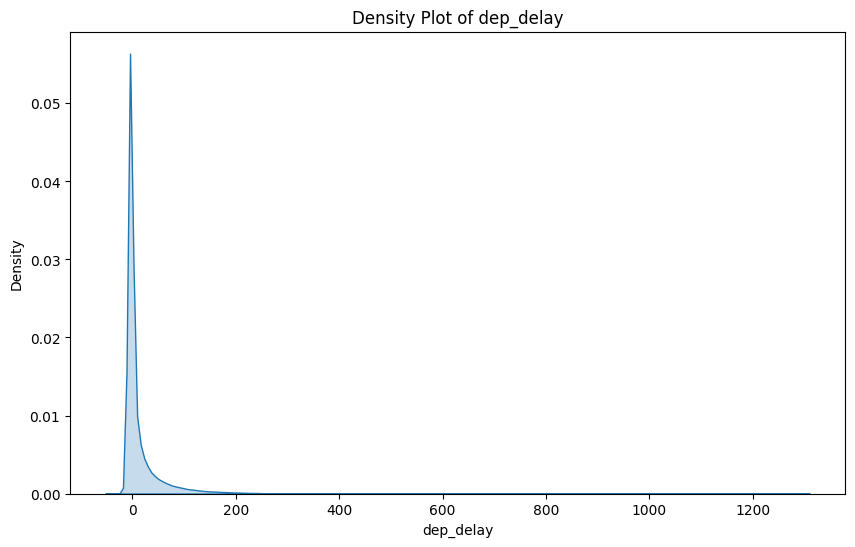

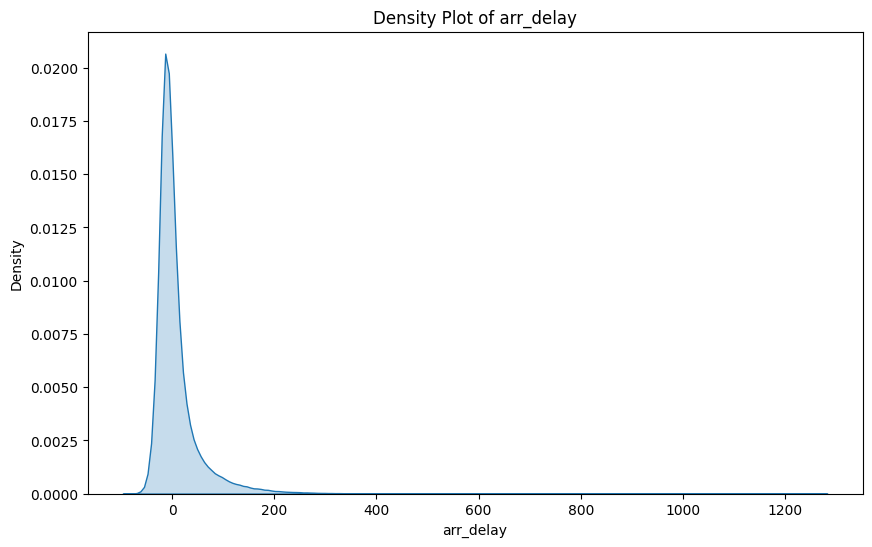

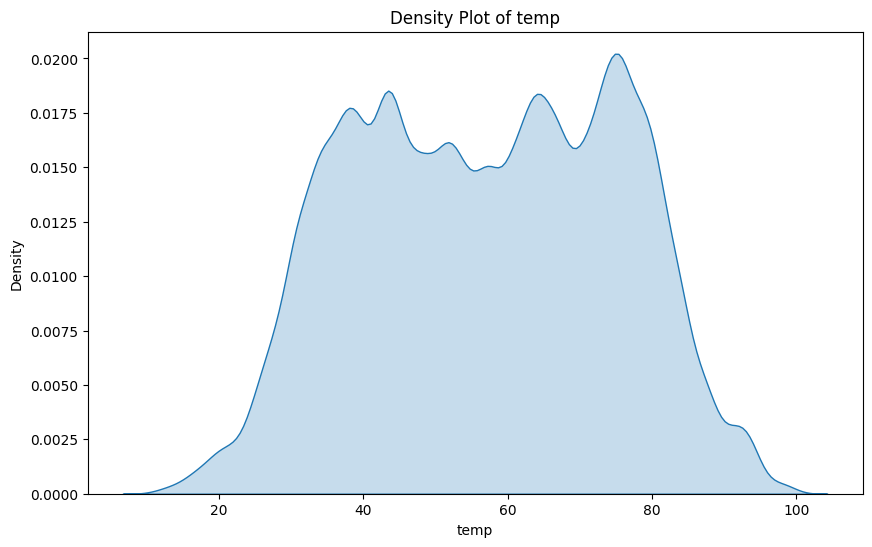

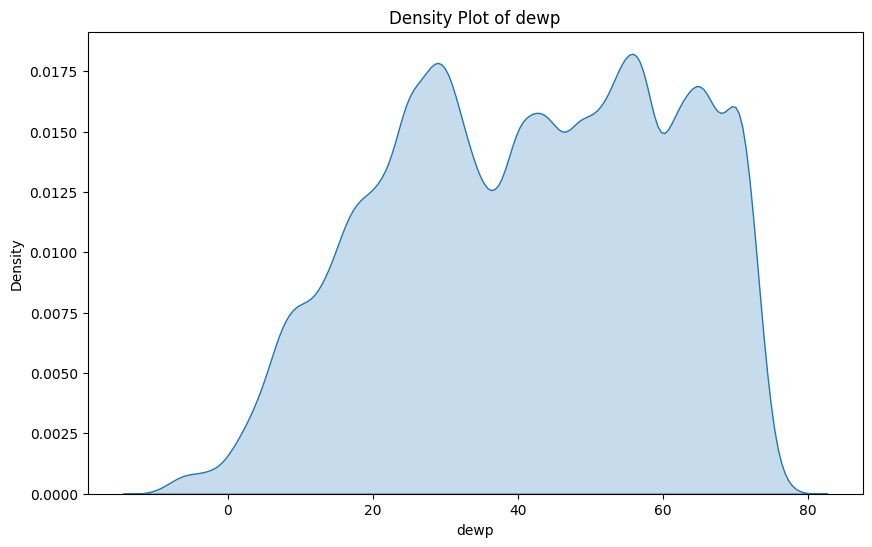

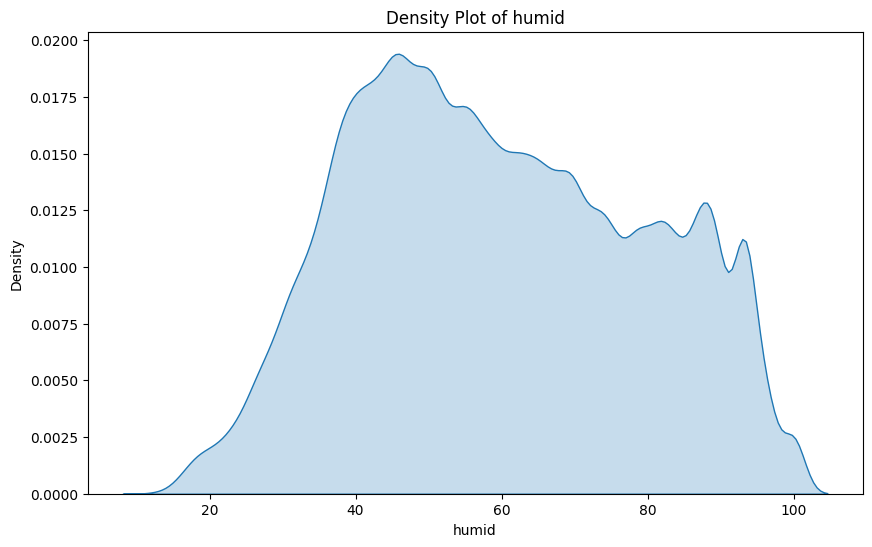

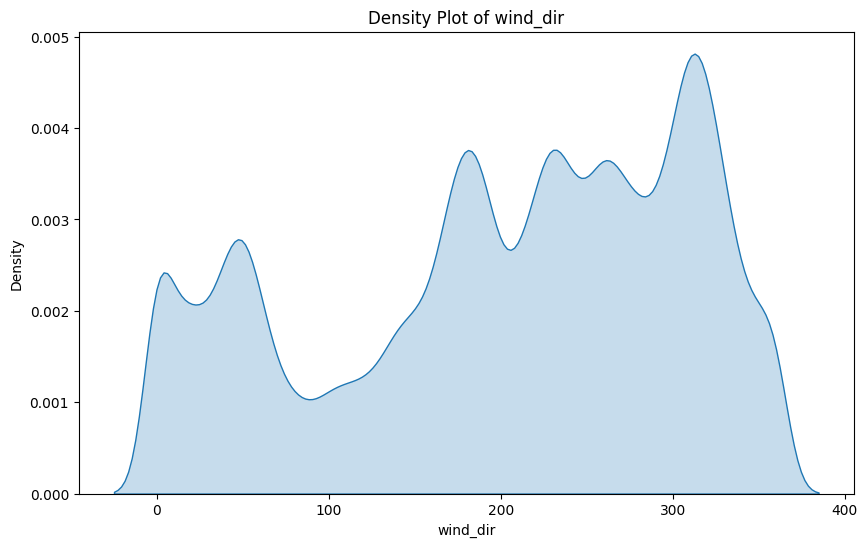

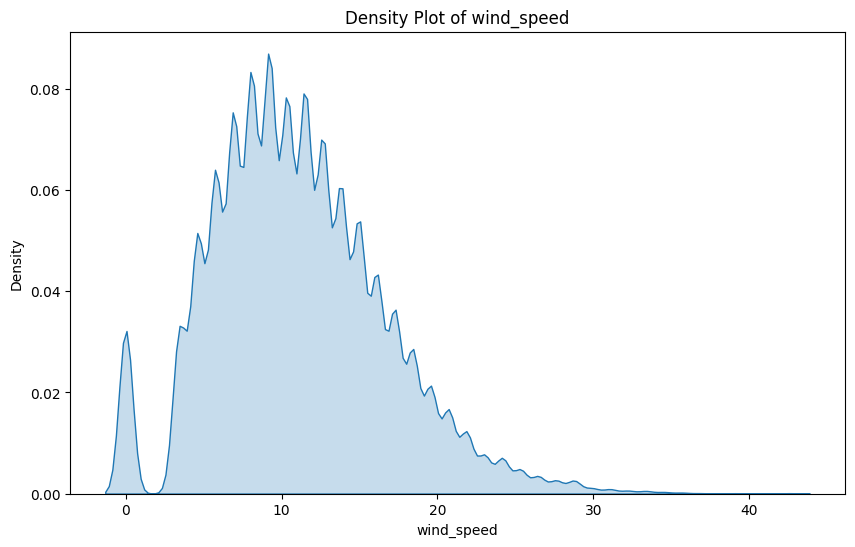

In [41]:
#Histograms and density plots
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

abt_df = pd.read_csv('ABT_csv')

continuous_features = ['dep_delay', 'arr_delay', 'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed']

for feature in continuous_features:
    # Calculate Scott's bin width
    n = len(abt_df[feature])
    bin_width = 3.5 * abt_df[feature].std() / np.power(n, 1/3)
    # Calculate the number of bins
    num_bins = int((abt_df[feature].max() - abt_df[feature].min()) / bin_width)

    plt.figure(figsize=(10, 6))
    plt.hist(abt_df[feature], bins=num_bins, color='darkblue', edgecolor='black')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

for feature in continuous_features:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=abt_df[feature], fill=True)
    plt.title(f'Density Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()



In [40]:
#Table data
import pandas as pd
import matplotlib.pyplot as plt

abt_df = pd.read_csv('ABT_csv')

continuous_features = ['dep_delay', 'arr_delay', 'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed']

continuous_stats = abt_df[continuous_features].describe().transpose()

missing_values_count = abt_df[continuous_features].isnull().sum()

missing_values_percentage = (missing_values_count / len(abt_df)) * 100

cardinality = abt_df[continuous_features].nunique()

continuous_data_quality_report = pd.DataFrame({
    'Feature': continuous_stats.index,
    'Minimum': continuous_stats['min'],
    '1st Quartile': continuous_stats['25%'],
    'Mean': continuous_stats['mean'],
    'Median': continuous_stats['50%'],
    '3rd Quartile': continuous_stats['75%'],
    'Maximum': continuous_stats['max'],
    'Standard Deviation': continuous_stats['std'],
    'Total Instances': len(abt_df),
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_values_percentage,
    'Cardinality': cardinality
})

print("Continuous Data Quality Report:")
print(continuous_data_quality_report)


Continuous Data Quality Report:
               Feature  Minimum  1st Quartile        Mean     Median  \
dep_delay    dep_delay   -43.00      -5.00000   12.639070   -2.00000   
arr_delay    arr_delay   -86.00     -17.00000    6.895377   -5.00000   
temp              temp    10.94      42.08000   56.996473   57.20000   
dewp              dewp    -9.94      26.06000   41.630886   42.80000   
humid            humid    12.74      43.99000   59.557390   57.73000   
wind_dir      wind_dir     0.00     130.00000  201.539911  220.00000   
wind_speed  wind_speed     0.00       6.90468   11.114294   10.35702   

            3rd Quartile     Maximum  Standard Deviation  Total Instances  \
dep_delay       11.00000  1301.00000           40.210061           336776   
arr_delay       14.00000  1272.00000           44.633292           336776   
temp            71.96000   100.04000           17.964952           336776   
dewp            57.92000    78.08000           19.352888           336776   
humid 

In [39]:
#Table data categorical features
import pandas as pd
import matplotlib.pyplot as plt

abt_df = pd.read_csv('ABT_csv')

categorical_features = ['dest', 'origin', 'carrier']

for feature in categorical_features:
    mode_value = abt_df[feature].mode()[0]
    
    mode_frequency = abt_df[feature].value_counts().max()
    
    mode_percentage = (mode_frequency / len(abt_df)) * 100
    
    second_mode_value = abt_df[feature].value_counts().index[1] if len(abt_df[feature].value_counts()) > 1 else None
    second_mode_frequency = abt_df[feature].value_counts().iloc[1] if len(abt_df[feature].value_counts()) > 1 else None
    
    second_mode_percentage = (second_mode_frequency / len(abt_df)) * 100 if second_mode_frequency else None
    
    missing_values_percentage = (abt_df[feature].isnull().sum() / len(abt_df)) * 100
    
    cardinality = abt_df[feature].nunique()
    
    total_count = len(abt_df)
    
    print(f"\nCategorical Data Quality Report for {feature}:")
    print(f"Mode: {mode_value}")
    print(f"Mode Frequency: {mode_frequency}")
    print(f"Mode Percentage: {mode_percentage}%")
    print(f"Second Mode: {second_mode_value}")
    print(f"Second Mode Frequency: {second_mode_frequency}")
    print(f"Second Mode Percentage: {second_mode_percentage}%")
    print(f"Missing Values Percentage: {missing_values_percentage}%")
    print(f"Cardinality: {cardinality}")
    print(f"Total Count: {total_count}")



Categorical Data Quality Report for dest:
Mode: ORD
Mode Frequency: 17283
Mode Percentage: 5.131897759935387%
Second Mode: ATL
Second Mode Frequency: 17215
Second Mode Percentage: 5.111706297360858%
Missing Values Percentage: 0.0%
Cardinality: 105
Total Count: 336776

Categorical Data Quality Report for origin:
Mode: EWR
Mode Frequency: 120835
Mode Percentage: 35.879932061667105%
Second Mode: JFK
Second Mode Frequency: 111279
Second Mode Percentage: 33.042437703399294%
Missing Values Percentage: 0.0%
Cardinality: 3
Total Count: 336776

Categorical Data Quality Report for carrier:
Mode: UA
Mode Frequency: 58665
Mode Percentage: 17.419590469629664%
Second Mode: B6
Second Mode Frequency: 54635
Second Mode Percentage: 16.222949378815592%
Missing Values Percentage: 0.0%
Cardinality: 16
Total Count: 336776


In [ ]:
import pandas as pd

abt_df = pd.read_csv('ABT_csv')

print(abt_df)

In [45]:
#ABT

import pandas as pd

flights_df = pd.read_csv('CasusEDA/csv/flights_csv')
weather_df = pd.read_csv('CasusEDA/csv/weather_csv')

flights_selected = flights_df[['dest', 'origin', 'carrier', 'dep_delay', 'arr_delay', 'time_hour']]
weather_selected = weather_df[['origin', 'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed', 'time_hour']]

merged_df = flights_selected.merge(weather_selected, how='left', on=['time_hour', 'origin'])
merged_df['time_hour'] = pd.to_datetime(df['time_hour'])

print(merged_df)
merged_df.to_csv('ABT_csv', index=False)

       dest origin carrier  dep_delay  arr_delay           time_hour   temp  \
0       IAH    EWR      UA        2.0       11.0 2013-01-01 05:00:00  39.02   
1       IAH    LGA      UA        4.0       20.0 2013-01-01 05:00:00  39.92   
2       MIA    JFK      AA        2.0       33.0 2013-01-01 05:00:00  39.02   
3       BQN    JFK      B6       -1.0      -18.0 2013-01-01 05:00:00  39.02   
4       ATL    LGA      DL       -6.0      -25.0 2013-01-01 06:00:00  39.92   
...     ...    ...     ...        ...        ...                 ...    ...   
336771  DCA    JFK      9E        NaN        NaN 2013-09-30 14:00:00  68.00   
336772  SYR    LGA      9E        NaN        NaN 2013-09-30 22:00:00  64.94   
336773  BNA    LGA      MQ        NaN        NaN 2013-09-30 12:00:00  69.08   
336774  CLE    LGA      MQ        NaN        NaN 2013-09-30 11:00:00  66.92   
336775  RDU    LGA      MQ        NaN        NaN 2013-09-30 08:00:00  60.98   

         dewp  humid  wind_dir  wind_speed  
0     

In [ ]:
import pandas as pd

airlines = pd.read_csv('CasusEDA/csv/airlines_csv')
flights = pd.read_csv('CasusEDA/csv/flights_csv')

df = pd.merge(airlines,flights,on='carrier')
df1 = df.where(flights['carrier'] =='AA')

print(df)


In [35]:
import pandas as pd

weather = pd.read_csv('CasusEDA/csv/weather_csv')

weather


,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01 01:00:00
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01 02:00:00
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,2013-01-01 03:00:00
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,2013-01-01 04:00:00
4,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26110,LGA,2013,12,30,14,35.96,19.94,51.78,340.0,13.80936,21.86482,0.0,1017.1,10.0,2013-12-30 14:00:00
26111,LGA,2013,12,30,15,33.98,17.06,49.51,330.0,17.26170,21.86482,0.0,1018.8,10.0,2013-12-30 15:00:00
26112,LGA,2013,12,30,16,32.00,15.08,49.19,340.0,14.96014,23.01560,0.0,1019.5,10.0,2013-12-30 16:00:00
26113,LGA,2013,12,30,17,30.92,12.92,46.74,320.0,17.26170,NaN,0.0,1019.9,10.0,2013-12-30 17:00:00


In [ ]:
import pandas as pd

airports = pd.read_csv('CasusEDA/csv/airports_csv')

airports

In [36]:
import pandas as pd

flights = pd.read_csv('CasusEDA/csv/flights_csv')

flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30 14:00:00
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-09-30 22:00:00
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 12:00:00
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 11:00:00


In [ ]:
import pandas as pd

planes = pd.read_csv('CasusEDA/csv/planes_csv')

planes

In [ ]:
import pandas as pd

airlines = pd.read_csv('CasusEDA/csv/airlines_csv')

airlines